# <center> <div class="alert-block alert-info alert"> <span style = "color:crimson;"> Drinking Water Potability | EDA and Prediction </center>

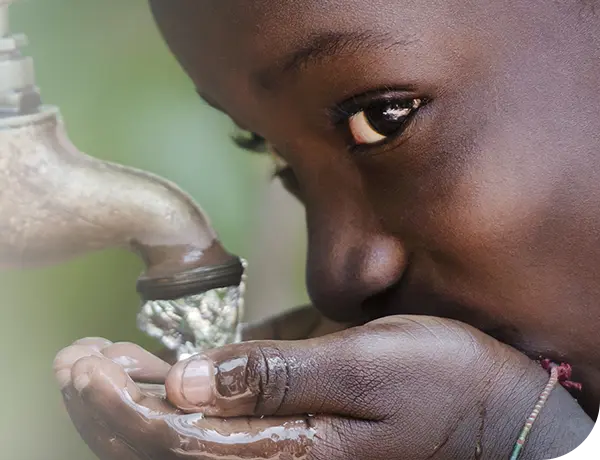

**Water is  perhaps  the  most  precious  natural resource after air. Though the surface of the earth is mostly consists of water, only a small part of it is usable, which makes this resource very limited. This precious and limited resource, therefore, must be used with prudence. As water is required for different purposes, the suitability of it must be checked before use. Also,  sources of  water  must be  monitored regularly  to determine  whether  they  are  in  sound  health  or  not.  Poor condition  of  water  bodies  are  not  only  the  indictor  of environmental  degradation,  it  is  also  a  threat  to  the ecosystem. In industries, improper quality of water may cause hazards and severe economic loss. Thus, the quality of water is very important in both environmental and economic aspects. Thus,  water  quality analysis  is essential for  using it  in any purpose.**

# Data Description

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# <center> <div class="alert-block alert-info alert"> <span style = "color:crimson;"> Importing Libraries </center>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [ ]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
df.head(n=5)

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

# <center> <div class="alert-block alert-info alert"> <span style = "color:crimson;"> Exploratory Data Analysis </center>

In [ ]:
df.describe().T

In [ ]:
df.info()

In [ ]:
df.shape

# Handiling Missing Data

In [ ]:
df.isnull().sum()

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
df.isnull().sum()

# Removing Duplicates

if any

In [ ]:
df.duplicated().sum()

# Data visualization

In [ ]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.countplot(x='Potability',data=df)
plt.show()

In [ ]:
plt.figure(figsize=(20,16))
ddf=df.drop('Potability',axis=True)
for i,column in enumerate(ddf.columns,1):
    plt.subplot(3,3,i)
    sns.distplot(ddf[column],hist=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,16))
for i,column in enumerate(ddf.columns,1):
    sns.displot(df,x=ddf[column], hue="Potability", kind="kde", multiple="stack")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

# Outlier Treatment

**Outlier visualize**

In [ ]:
plt.figure(figsize=(20,20))
for i,column in enumerate(ddf.columns,1):
    plt.subplot(5,2,i)
    sns.boxplot(data = ddf,x = ddf[column],orient = 'h')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
for i,column in enumerate(ddf.columns,1):
    plt.subplot(5,2,i)
    sns.violinplot(data = ddf,x = ddf[column],orient = 'h')
plt.show()

**Outlier prevention**

In [ ]:
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

In [ ]:
threshold = 2.5
print(np.where(zscore > 2.5))

In [ ]:
df_clean=df
df_clean = df_clean[(zscore<2.5).all(axis=1)]

In [ ]:
df.shape,df_clean.shape

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df_clean,orient='h')

In [ ]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mscale=MinMaxScaler()
mscale.fit_transform(x_train)
mscale.transform(x_test)

# <center> <div class="alert-block alert-info alert"> <span style = "color:crimson;"> Models </center>

# LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

log_acc=accuracy_score(y_test,log_reg.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(x_test))*100))

In [ ]:
y_pred=log_reg.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# DecisionTreeClassifier

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

d_acc=accuracy_score(y_test,d_tree.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,d_tree.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(x_test))*100))

In [ ]:
y_pred=d_tree.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# RandomForestClassifier

In [ ]:
r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc=accuracy_score(y_test,r_for.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,r_for.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,r_for.predict(x_test))*100))

In [ ]:
y_pred=r_for.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# KNeighborsClassifier

In [ ]:
k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

In [ ]:
y_pred=k_nei.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# SVC

In [ ]:
s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))

In [ ]:
y_pred=s_vec.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# GaussianNB

In [ ]:
g_clf = GaussianNB()
g_clf.fit(x_train,y_train)

g_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,g_clf.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,g_clf.predict(x_test))*100))

In [ ]:
y_pred=g_clf.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
y_pred=g_clf.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# GridSearchCV RandomClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
nEstimator = [10,11,12,13,14,15,16]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10]
min_samples_split=[2, 5, 10, 15]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(x_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

In [ ]:
GS_acc = accuracy_score(y_test,gsv.predict(x_test))
y_pred=gsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# RandomSearchcv RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
nEstimator = [10,11,12,13,14,15,16,17,18]
depth = [5,10,20,30,40,50,60]
criterion=['entropy', 'gini']
min_samples_leaf=[1, 2, 5, 10,12,14]
min_samples_split=[2, 5, 10, 15,16,17]
max_features = ['auto', 'sqrt','log2']

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth,'criterion':criterion,'max_features': max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}]
rsv = RandomizedSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
rsv.fit(x_train,y_train)
print("Best HyperParameter: ",rsv.best_params_)
print(rsv.best_score_)

In [ ]:
RS_acc = accuracy_score(y_test,s_vec.predict(x_test))
y_pred=rsv.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree',
             'Random Forest',  'Gaussian','GridsearchRF','RandomRf'],
    'Score': [ log_acc,k_acc, s_acc, d_acc, r_acc, g_acc,GS_acc,RS_acc]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Model", y="Score", data=models)
plt.show()

# <center> <div class="alert-block alert-info alert"> <span style = "color:crimson;"> Done </center>